In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Customer Churn Prediction/Churn_Modelling.csv')

In [ ]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df.drop(['RowNumber'], axis = 1, inplace = True)

In [ ]:
df.shape

(10000, 13)

In [ ]:
df.nunique()

,0
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2


# Feature Engineering

In [ ]:
df['Balance'].describe()

,Balance
count,10000.000000
mean,76485.889288
std,62397.405202
min,0.000000
25%,0.000000
50%,97198.540000
75%,127644.240000
max,250898.090000


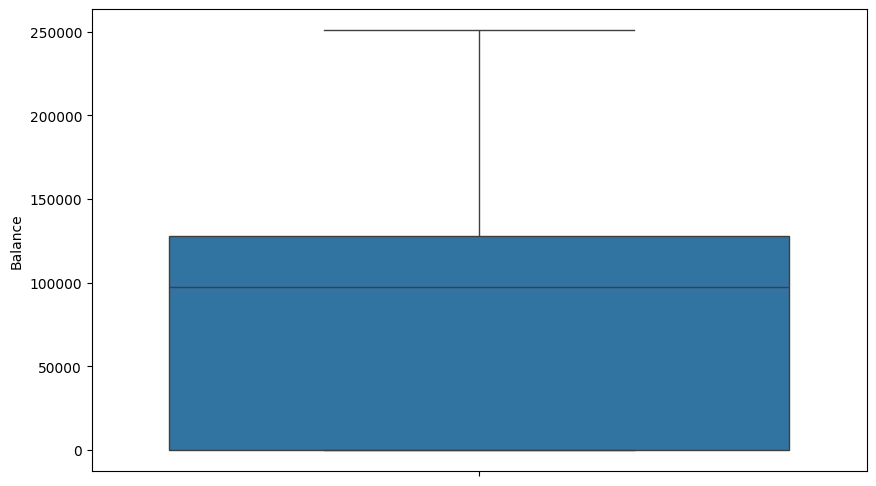

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(df['Balance'])
plt.show()

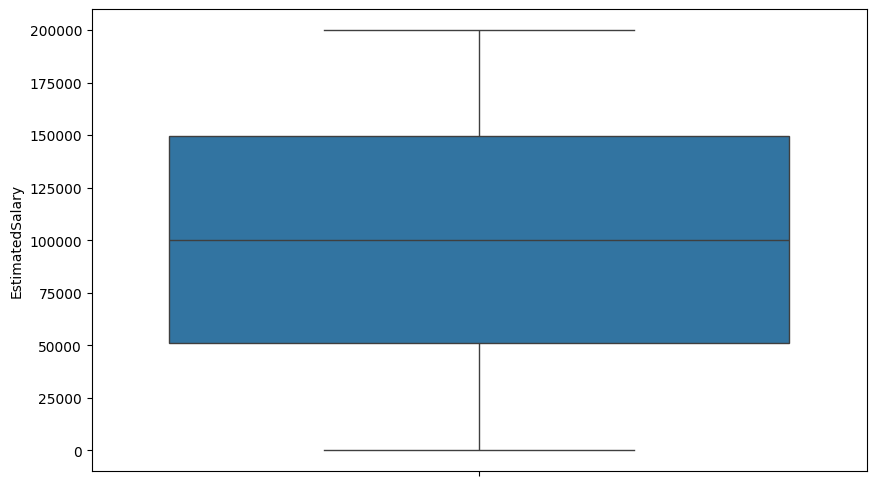

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(df['EstimatedSalary'])
plt.show()

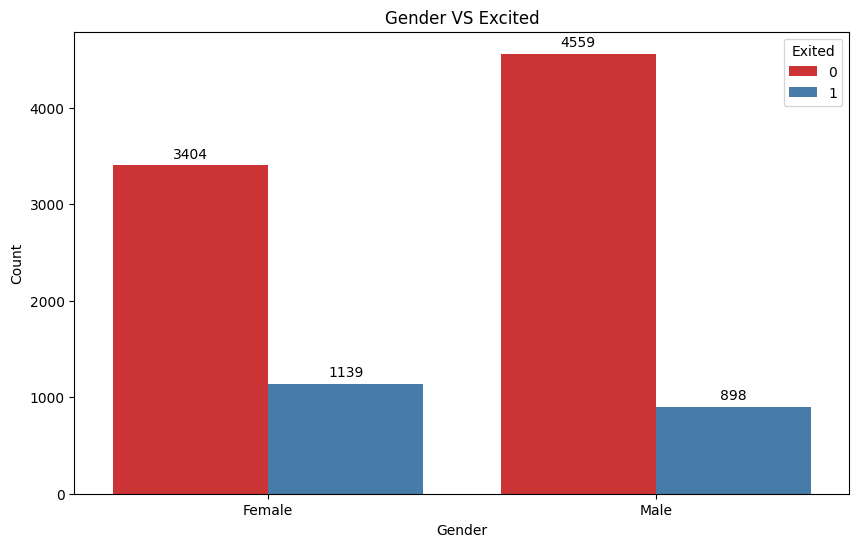

In [ ]:
fig = plt.figure(figsize = (10, 6))
ax = sns.countplot(data = df, x = 'Gender', hue = 'Exited', palette = 'Set1')

for container in ax.containers:
  ax.bar_label(container, label_type = 'edge', padding = 3)

plt.title('Gender VS Excited')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Change the categorical data into numeric data**

In [ ]:
df.dtypes

,0
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Surname'] = le.fit_transform(df['Surname'])
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,15574012,537,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,15592531,177,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,15656148,2000,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,15792365,1146,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,15592389,1081,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['CreditScore'] = scaler.fit_transform(df[['CreditScore']])
df['Balance'] = scaler.fit_transform(df[['Balance']])
df['EstimatedSalary'] = scaler.fit_transform(df[['EstimatedSalary']])

In [ ]:
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,1115,0.538,0,0,42,2,0.000000,1,1,1,0.506735,1
1,15647311,1177,0.516,2,0,41,1,0.334031,1,0,1,0.562709,0
2,15619304,2040,0.304,0,0,42,8,0.636357,3,1,0,0.569654,1
3,15701354,289,0.698,0,0,39,1,0.000000,2,0,0,0.469120,0
4,15737888,1822,1.000,2,0,43,2,0.500246,1,1,1,0.395400,0
5,15574012,537,0.590,2,1,44,8,0.453394,2,1,0,0.748797,1
6,15592531,177,0.944,0,1,50,7,0.000000,2,1,1,0.050261,0
7,15656148,2000,0.052,1,0,29,4,0.458540,4,1,0,0.596733,1
8,15792365,1146,0.302,0,1,44,4,0.566170,2,0,1,0.374680,0
9,15592389,1081,0.668,0,1,27,2,0.536488,1,1,1,0.358605,0


In [ ]:
x_data = df.drop(['Exited'], axis = 1)
y_data = df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score


lr = LogisticRegression()
dt = DecisionTreeClassifier()
xgb = xgb.XGBClassifier()

In [ ]:
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_lr = lr.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_xgb = xgb.predict(x_test)

In [ ]:
print('Logistic Regression Accuracy: ', accuracy_score(y_test, y_pred_lr)*100,'%')

Logistic Regression Accuracy:  78.3 %


In [ ]:
print('Decision Tree Accuracy: ', accuracy_score(y_test, y_pred_dt)*100,'%')

Decision Tree Accuracy:  79.35 %


In [ ]:
print('XGBoost Accuracy: ', accuracy_score(y_test, y_pred_xgb)*100,'%')

XGBoost Accuracy:  85.05 %
